In [80]:
#from scipy.io.wavfile import read
import numpy as np
import soundfile as sf
import sounddevice as sd
import random
import matplotlib.pyplot as plt
from scipy.io import wavfile
import time
import wave
file = 'dog.wav'
with wave.open(file, 'rb') as wav_file:
    sample_width = wav_file.getsampwidth()
    num_channels = wav_file.getnchannels()
    
data, sr = sf.read('encrypted.wav', dtype='int16')  
print(sr)
sd.play(data)

44100


In [81]:
print(data)

[[ -1580  20543]
 [ 12229 -16455]
 [-17972  -7259]
 ...
 [   512 -12544]
 [ -7988    564]
 [  4119      1]]


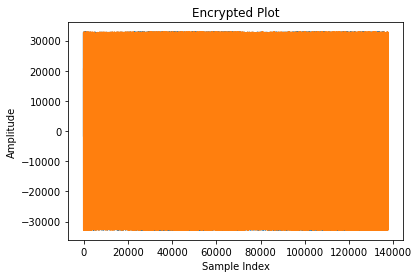

In [82]:
plt.plot(data)
plt.title('Encrypted Plot')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

In [83]:
# fs, output = wavfile.read('encrypted.wav')
# plt.plot(output)

In [84]:
import wave
import struct

def audio_to_binary(filename):
    with wave.open(filename, "rb") as wav_file:
        # Read the binary data from the wave file
        binary_data = wav_file.readframes(wav_file.getnframes())
        # Unpack the binary data and return it as a list of integers
        audio = list(struct.unpack("B"*len(binary_data), binary_data))
        
        return np.vectorize(np.binary_repr)(audio, 8)


def binary_to_audio(binary_data, filename, sample_width, channels, sample_rate=44100):
    # Open a wave file for writing
    with wave.open(filename, "w") as wav_file:
        # Set the sample width and number of channels
        wav_file.setsampwidth(sample_width)
        wav_file.setnchannels(channels)
        # Set the sample rate
        wav_file.setframerate(sample_rate)
        # Write the binary data to the wave file
        for byte in binary_data:
            data = struct.pack("B", byte)
            wav_file.writeframes(data)

In [85]:
bin_audio_list = audio_to_binary("encrypted.wav")       #max = 255, min=0 list of integers

In [86]:
def DNA(line, l):
    Base_map = {"00":"A", "01":"G", "10":"C", "11":"T"}
    x=""
    temp = [line[i:i+2] for i in range(0, l, 2)]
    for j in range (l//2) :
         x += Base_map[temp[j]]
    
    return x

def revDNA(line, l):
    Code_map = {"A":"00", "G":"01", "C": "10", "T":"11"}
    x = ""
    temp = [line[i:i+1] for i in range(0,l)]
    for j in range(l):
        x += Code_map[temp[j]]
    return x

In [87]:
starttime = time.time()

In [88]:
a = ''.join([DNA(item, len(item)) for item in bin_audio_list])

In [89]:
#a

In [90]:
la = len(a)

with open("key.txt", "r") as file:
    b=file.read()
    
lb= len(b)


In [91]:
info=[]
with open("info.txt", "r") as file:
    content = file.read()
    content = content.split("\n")
    info = [int(x) for x in content[0:len(content)-1]]
    

In [92]:
import math
rand = []
d=''
j=0
k=0
i=0
ind = 0
ran = 0
flag = 1
while(i<la):
    if((a[i]=='A' and b[j]=='T') or (a[i]=='T' and b[j]=='A') or (a[i]=='G' and b[j]=='C') or (a[i]=='C' and b[j]=='G')):
        d += a[i]
        if(flag):      #first time on map
            inc = math.isqrt(info[k] - (i**2))
            ind = i
            ran = inc
            flag=0
        else:
            inc = (info[k] - ((len(d)-1)*ind))//ran
        i += inc
        k += 1
    else:
        d += a[i]
    i += 1
    j = (j+1)%lb
    

In [93]:
#d

In [94]:
ld = len(d)
split_d= [d[i:4+i] for i in range(0, ld, 4)]

In [95]:
split_audio = [int(p, 2) for p in [revDNA(item, len(item)) for item in split_d]]

In [96]:
#split_audio.pop()

In [97]:
#split_audio[len(split_audio)-1] = 255

In [98]:
#print(split_audio)

In [ ]:
binary_to_audio(split_audio, 'decrypted.wav', sample_width, num_channels )
endtime = time.time()

In [ ]:
with open("dectime.txt", "a") as file:
    file.write(str(lb))
    file.write(" ")
    file.write(b)
    file.write(" ")
    file.write(str(endtime-starttime))
    file.write("\n")

In [ ]:
data2, sr = sf.read('decrypted.wav', dtype='int16')  
print(sr)
sd.play(data2)

In [ ]:
plt.plot(data2)
plt.title('Decrypted Plot')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# mapped_array = np.array([DNA(elem, 8) for elem in bin_audio_list])
# print(mapped_array)